<a href="https://colab.research.google.com/github/arsan13/data-science/blob/main/SVM_SUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine(SVM) Classifier for SUV dataset**


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### **1. Collect Data**

In [ ]:
df = pd.read_csv('/content/suv_data.csv')

### **2. Analyse Data**

In [ ]:
df.head ()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.groupby ('Purchased').size()

Purchased
0    257
1    143
dtype: int64

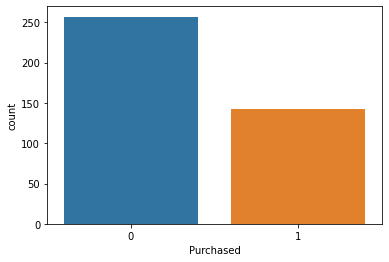

In [ ]:
sns.countplot (x = 'Purchased', data = df)

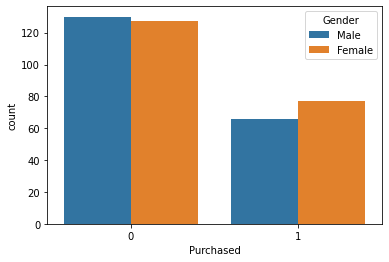

In [ ]:
sns.countplot ( x = 'Purchased', hue = 'Gender', data = df)

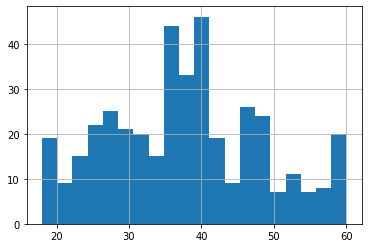

In [ ]:
df ['Age'].hist(bins = 20)

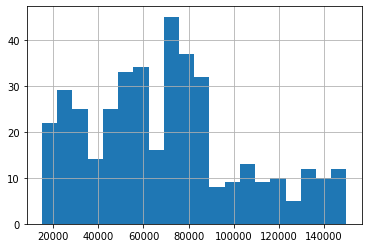

In [ ]:
df ['EstimatedSalary'].hist(bins = 20)

### **3. Data Wrangling**

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Drops unnnecesary columns, gender is dropped because of low variance filter
cleaned_df = df.drop (columns = ['User ID', 'Gender'], axis = '1')
cleaned_df.head ()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


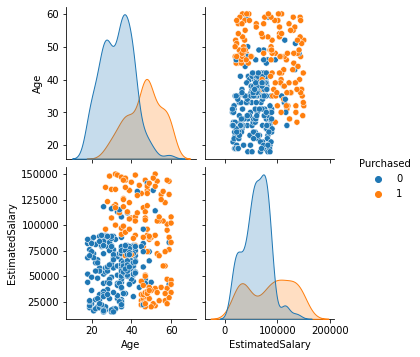

In [ ]:
sns.pairplot(cleaned_df, diag_kind='kde', hue='Purchased')

### **4. Building Model**

In [ ]:
x = cleaned_df.drop('Purchased', axis=1)
y = cleaned_df['Purchased']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [ ]:
# plt.scatter(x=x_train[:,0], y=x_train[:,1], c=y_train, cmap='winter')
# plt.show()

In [ ]:
# classifier=SVC(kernel='linear',gamma='auto',random_state=0)
classifier=SVC(kernel='rbf',gamma='auto',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)

### **5. Evaluating Model**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.86      0.89      0.88        36

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
accuracy_score(y_test, y_pred)

0.91